In [675]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [676]:
df=pd.read_csv("CustomerDataSet.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [677]:
df= df.drop("CustomerID", axis=1)
# df=df.head(10000)

# Preprocessing:

In [678]:
# Null:
print(df.isnull().sum())
print(f"Describe:\n{df.describe()}")
print(f"Shape:{df.shape}")

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
Describe:
                Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction         Churn  
count   64374.000000  64374.00000

In [679]:
# Encoding catagorical values:
data=df.copy()
data=pd.get_dummies(df,columns=["Subscription Type"])
data=pd.get_dummies(data,columns=["Contract Length"])
data=data.replace({True:1,False:0})

Label_Encoder=LabelEncoder()
data["Gender"]=Label_Encoder.fit_transform(df["Gender"])

data.head()

C:\Users\dhrub\AppData\Local\Temp\ipykernel_13556\2616621747.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({True:1,False:0})


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,0,25,14,4,27,598,9,1,1,0,0,0,1,0
1,41,0,28,28,7,13,584,20,0,0,0,1,0,1,0
2,47,1,27,10,2,29,757,21,0,0,1,0,1,0,0
3,35,1,9,12,5,17,232,18,0,0,1,0,0,0,1
4,53,0,58,24,9,2,533,18,0,0,0,1,1,0,0


In [680]:
# defining X and y (KEEP X AS DATAFRAME)
X = data.drop("Churn", axis=1)
y = data["Churn"]

print(f"X:\n{X}")
print(f"y:\n{y}")

X:
       Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       22       0      25               14              4             27   
1       41       0      28               28              7             13   
2       47       1      27               10              2             29   
3       35       1       9               12              5             17   
4       53       0      58               24              9              2   
...    ...     ...     ...              ...            ...            ...   
64369   45       0      33               12              6             21   
64370   37       1       6                1              5             22   
64371   25       1      39               14              8             30   
64372   50       0      18               19              7             22   
64373   52       0      45               15              9             25   

       Total Spend  Last Interaction  Subscription Type_Basic  \
0      

In [681]:
# spliting data:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [682]:
# feature scaling:
num_cols = ['Age','Tenure','Usage Frequency','Support Calls',
            'Payment Delay','Total Spend','Last Interaction']

scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

# NeuralNetwork:

In [683]:
# model training
reg = tf.keras.regularizers.l2(0.001) # type: ignore

model = Sequential([
    Dense(50, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=reg),
    Dense(25, activation='relu', kernel_regularizer=reg),
    Dense(12, activation='relu', kernel_regularizer=reg),
    Dense(1, activation='sigmoid')
])

c:\Users\dhrub\OneDrive\Desktop\vs coding\DeepLearning\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [684]:
# opeimization define
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-3)),  # type: ignore # Adaptive moment estimation
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [685]:
# model training:
print(f"Model summary:\n{model.summary()}")
history=model.fit(x_train,y_train,epochs=10,batch_size=500,validation_split=0.2,verbose=1)
print(f"Keys on history :{history.history.keys()}")

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 50)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,350 (9.18 KB)

 Trainable params: 2,350 (9.18 KB)

 Non-trainable params: 0 (0.00 B)

Model summary:
None
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7532 - loss: 0.5929 - val_accuracy: 0.8394 - val_loss: 0.4443
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.4095 - val_accuracy: 0.8687 - val_loss: 0.3653
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3440 - val_accuracy: 0.8910 - val_loss: 0.3118
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.2980 - val_accuracy: 0.9091 - val_loss: 0.2770
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2674 - val_accuracy: 0.9189 - val_loss: 0.2495
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.2438 - val_accuracy: 0.9261 - val_loss: 0.2333
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9305 - loss: 0.2245 - val_accuracy: 0.9351 - val_loss: 0.2150
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9376 - loss: 0.2085 - val_accuracy

In [686]:
# Making prediction from testing data:
y_prob = model.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)

403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


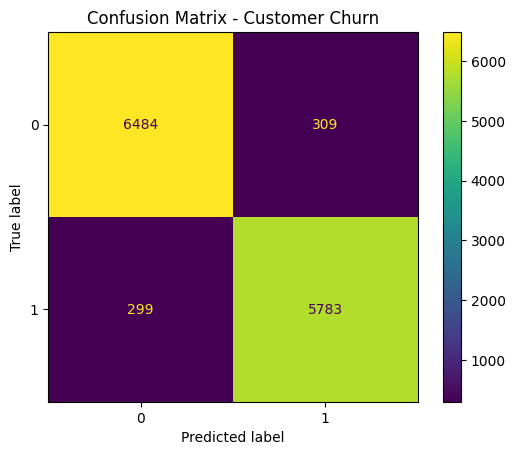

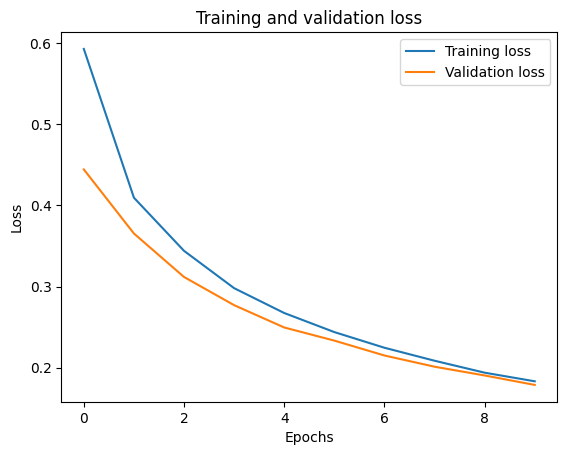

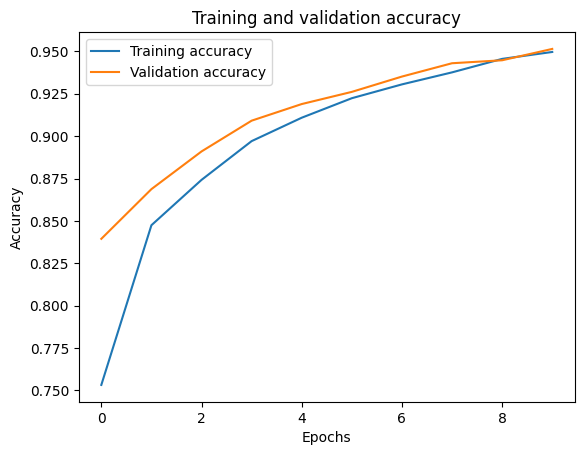

In [687]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Customer Churn")
plt.show()

# ploting loss on trainging vs loss on validation
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# ploting accuracy on training vs acccuracy on validation
plt.figure()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [688]:
# -------------------------------
# No-churn case user input
# -------------------------------

# Example customer input (No Churn scenario)
user_input = [
    30,     # Age
    0,      # Gender (0 = Female, 1 = Male)
    24,     # Tenure (months)
    15,     # Usage Frequency
    0,      # Support Calls
    0,      # Payment Delay (days)
    1200,   # Total Spend
    2,      # Last Interaction (days ago)
    0, 0, 1,   # Subscription Type_Basic, Standard, Premium
    0, 0, 1    # Contract Length_Monthly, Quarterly, Annual
]

# Convert to array
user_array = np.array(user_input).reshape(1, -1)

# Indices of numeric features to scale (same as training)
numeric_idx = [0,2,3,4,5,6,7]  # Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction
user_array[:, numeric_idx] = scaler.transform(user_array[:, numeric_idx])

# Make prediction
pred_prob = model.predict(user_array)[0][0]
pred_class = int(pred_prob > 0.5)

print(f"Predicted probability of churn: {pred_prob:.2f}")
print("Predicted class:", "CHURN 🚨" if pred_class==1 else "NO CHURN ✅")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted probability of churn: 0.00
Predicted class: NO CHURN ✅


c:\Users\dhrub\OneDrive\Desktop\vs coding\DeepLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [689]:
# -------------------------------
# Churn case user input
# -------------------------------

# Example customer input (Churn scenario)
user_input = [
    45,     # Age
    1,      # Gender (1 = Male, 0 = Female)
    2,      # Tenure (months)
    3,      # Usage Frequency
    5,      # Support Calls
    10,     # Payment Delay (days)
    200,    # Total Spend
    30,     # Last Interaction (days ago)
    0, 1, 0,   # Subscription Type_Basic, Standard, Premium
    1, 0, 0    # Contract Length_Monthly, Quarterly, Annual
]

# Convert to array
user_array = np.array(user_input).reshape(1, -1)

# Indices of numeric features to scale (same as training)
numeric_idx = [0,2,3,4,5,6,7]  # Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction
user_array[:, numeric_idx] = scaler.transform(user_array[:, numeric_idx])

# Make prediction
pred_prob = model.predict(user_array)[0][0]
pred_class = int(pred_prob > 0.5)

print(f"Predicted probability of churn: {pred_prob:.2f}")
print("Predicted class:", "CHURN 🚨" if pred_class==1 else "NO CHURN ✅")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted probability of churn: 0.21
Predicted class: NO CHURN ✅


c:\Users\dhrub\OneDrive\Desktop\vs coding\DeepLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [690]:
# # Taking user input:
feature_names = X.columns

def predict_churn(model, scaler, feature_names):
    import pandas as pd
    
    print("\nEnter customer details:")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    tenure = int(input("Tenure: "))
    usage = int(input("Usage Frequency: "))
    support = int(input("Support Calls: "))
    delay = int(input("Payment Delay): "))
    spend = float(input("Total Spend: "))
    last = int(input("Last Interaction (days): "))
    sub_type = input("Subscription Type (Basic/Standard/Premium): ")
    contract = input("Contract Length (Monthly/Quarterly/Annual): ")

    # Encode gender
    gender_encoded = 1 if gender.lower() == "male" else 0

    # Create base row with **plain numbers** for DataFrame
    user_dict = {
        "Age": age,
        "Gender": gender_encoded,
        "Tenure": tenure,
        "Usage Frequency": usage,
        "Support Calls": support,
        "Payment Delay": delay,
        "Total Spend": spend,
        "Last Interaction": last,
        "Subscription Type_Basic": 0,
        "Subscription Type_Standard": 0,
        "Subscription Type_Premium": 0,
        "Contract Length_Monthly": 0,
        "Contract Length_Quarterly": 0,
        "Contract Length_Annual": 0
    }

    # Set correct one-hot encoding safely (capitalize first letter)
    sub_type = sub_type.capitalize()
    contract = contract.capitalize()
    if f"Subscription Type_{sub_type}" in user_dict:
        user_dict[f"Subscription Type_{sub_type}"] = 1
    else:
        print(f"Warning: Subscription Type '{sub_type}' not recognized!")

    if f"Contract Length_{contract}" in user_dict:
        user_dict[f"Contract Length_{contract}"] = 1
    else:
        print(f"Warning: Contract Length '{contract}' not recognized!")

    # Convert to DataFrame
    user_df = pd.DataFrame([user_dict])
    user_df = user_df.reindex(columns=feature_names, fill_value=0)

    # Scale numerical columns
    num_cols = ['Age','Tenure','Usage Frequency','Support Calls',
                'Payment Delay','Total Spend','Last Interaction']
    user_df[num_cols] = scaler.transform(user_df[num_cols])

    # Prediction
    prob = model.predict(user_df)[0][0]
    pred = 1 if prob > 0.5 else 0

    print("\nPrediction:", "CHURN" if pred == 1 else "NOT CHURN")
    print("Churn probability:", round(prob, 3))

predict_churn(model, scaler, feature_names)



Enter customer details:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Prediction: NOT CHURN
Churn probability: 0.0
